In [1]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_boston
# データのロード、マージ
# scikit-learn に付属しているデータセットの１つboston（ボストン市の住宅価格）をロード
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

# 説明変数、目的変数
X = df.iloc[:, :-1].values
Y = df.loc[:, 'MEDV'].values
# 学習用、検証用データに分割
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X
                                                      , Y
                                                      , test_size = 0.3
                                                      , random_state = 666
                                                     )
# 必要なライブラリのインポート（回帰分析用ランダムフォレスト）
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor(n_estimators=10)
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [2]:
# 予測値を計算
Y_train_pred = forest.predict(X_train)
Y_test_pred = forest.predict(X_test)
# MSE(平均二乗誤差)の計算
# 0に近いほど良い（誤差がない）
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(Y_train, Y_train_pred), mean_squared_error(Y_test, Y_test_pred)) )
# R^2（決定係数）の計算
# 通常、0から1の値を取り、大きいほどモデルが適切（性能が良い、1は完全一致）
from sklearn.metrics import r2_score
print('R^2 train : %.3f, test : %.3f' % (r2_score(Y_train, Y_train_pred), r2_score(Y_test, Y_test_pred)) )

# 出力
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(Y_train, Y_train_pred), mean_squared_error(Y_test, Y_test_pred)) )
print('R^2 train : %.3f, test : %.3f' % (r2_score(Y_train, Y_train_pred), r2_score(Y_test, Y_test_pred)) )


MSE train : 1.982, test : 15.461
R^2 train : 0.978, test : 0.783
MSE train : 1.982, test : 15.461
R^2 train : 0.978, test : 0.783


In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


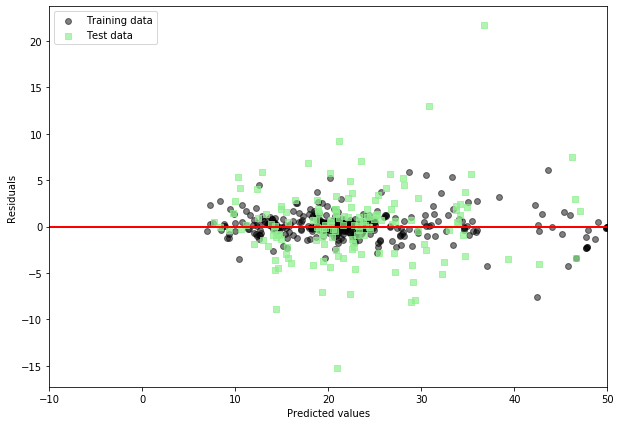

In [4]:
# matplotlibを呼び出し、あとおまじない
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(Y_train_pred
            , Y_train_pred - Y_train
            , c = 'black'
            , marker = 'o'
            , s = 35
            , alpha = 0.5
            , label = 'Training data'
           )
plt.scatter(Y_test_pred
            , Y_test_pred - Y_test
            , c = 'lightgreen'
            , marker = 's'
            , s = 35
            , alpha = 0.7
            , label = 'Test data'
           )
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0
           , xmin = -10
           , xmax = 50
           , lw = 2
           , color = 'red'
          )
plt.xlim([-10, 50])
plt.show()